### Consider the winequality-red.csv dataset (available at the webpage) where the goal is to estimate the quality (sensory appreciation) of a wine based on physicochemical inputs. 
### Using a 80-20 training-test split with a fixed seed (random_state=0), you are asked to learn MLP regressors to answer the following questions.
### Given their stochastic behavior, average the performance of each MLP from 10 runs (for reproducibility consider seeding the MLPs with random_state ∈ {1. .10}).

### 1) [3.5v] Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as default. Plot the distribution of the residues (in absolute value) using a histogram.

In [28]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
642             9.9             0.540         0.45             2.3      0.071   
679            10.8             0.260         0.45             3.3      0.060   
473             9.9             0.350         0.55             2.1      0.062   
390             5.6             0.850         0.05             1.4      0.045   
1096            6.6             0.725         0.09             5.5      0.117   
...             ...               ...          ...             ...        ...   
763             9.3             0.655         0.26             2.0      0.096   
835             7.6             0.665         0.10             1.5      0.066   
1216            7.9             0.570         0.31             2.0      0.079   
559            13.0             0.470         0.49             4.3      0.085   
684             9.8             0.980         0.32             2.3      0.078   

      free sulfur dioxide  

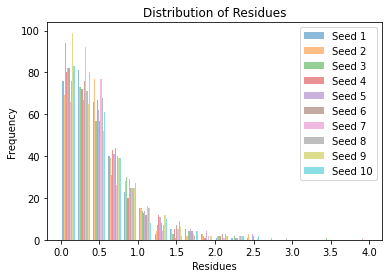

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

## APAGAR ################################################################################################
################################################################################################
################################################################################################
################################################################################################
################################################################################################
import warnings
warnings.filterwarnings("ignore")
    
# Reading the CSV file
df = pd.read_csv("winequality-red.csv", delimiter=";")

X = df.drop("quality", axis=1)  # Drop the "quality" column to get the features
y = df["quality"]  # Get the "quality" column as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
# Residues 
res = []

for state in range(1, 11):
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation = 'relu', random_state=state,\
                   early_stopping = True, validation_fraction = 0.2)
    mlp.fit(X_train, y_train)
    
    # Predict and calculate the residues
    pred = mlp.predict(X_test)

    res.append(np.abs(y_test - pred))
    
plt.hist(res, bins=20, alpha=0.5, label=[f'Seed {i}' for i in range(1, 11)])
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.title('Distribution of Residues')
plt.legend()
plt.show()

##
## Possiveis alteracoes:
##  1- Make regression anted do X_train (como usado na doscumentação)
##  2- Max_iters dentro do MLP_regressor (retirei pois não me lembro porque o pus lá)
##

### 2) [1.5v] Since we are in the presence of a integer regression task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.

In [33]:
from sklearn.metrics import mean_absolute_error

# Initialize lists to store MAE before and after rounding and bounding
mae_original = []
mae_round = []

# Define lower and upper bounds for estimates
lower_bound = 0  # Adjust as needed
upper_bound = 100  # Adjust as needed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Loop through random seeds from 1 to 10
for state in range(1, 11):
    # Create and train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation = 'relu', random_state=state,\
                   early_stopping = True, validation_fraction = 0.2)
    mlp.fit(X_train, y_train)
    
    # Predict and calculate the residues
    pred = mlp.predict(X_test)

    # Calculate the MAE before rounding and bounding
    mae_original.append(mean_absolute_error(y_test, pred))
    
    rounded_predictions = np.round(pred)  # Round to the nearest integer
    #y_rounded = np.clip(rounded_predictions, lower_bound, upper_bound)  # Bound the estimates within a range
    #mae_round.append(mean_absolute_error(y_test, y_rounded))
    
    # Calculate the MAE after rounding and bounding
    mae_round.append(mean_absolute_error(y_test, rounded_predictions))

# Print the MAE before and after rounding and bounding for each run
for i in range(10):
    print(f"State {i+1}: MAE Before = {mae_original[i]:.4f}, MAE After = {mae_round[i]:.4f}")

# Calculate the average MAE before and after rounding and bounding
average_mae_original = np.mean(mae_original)
average_mae_round = np.mean(mae_round)

# Print the average MAE before and after
print(f"Average MAE Before Round and Bound = {average_mae_original:.4f}")
print(f"Average MAE After Round and Bound = {average_mae_round:.4f}")


State 1: MAE Before = 0.5008, MAE After = 0.4375
State 2: MAE Before = 0.5266, MAE After = 0.4469
State 3: MAE Before = 0.4925, MAE After = 0.4313
State 4: MAE Before = 0.5066, MAE After = 0.4406
State 5: MAE Before = 0.5240, MAE After = 0.4656
State 6: MAE Before = 0.5135, MAE After = 0.4625
State 7: MAE Before = 0.5074, MAE After = 0.4062
State 8: MAE Before = 0.5298, MAE After = 0.4406
State 9: MAE Before = 0.5017, MAE After = 0.4281
State 10: MAE Before = 0.4943, MAE After = 0.4281
Average MAE Before Round and Bound = 0.5097
Average MAE After Round and Bound = 0.4388


### 3) [1.5v] Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch)

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize lists to store RMSE for different numbers of iterations
rmse_original = []  # RMSE for MLP with early stopping
rmse_iterations = []  # RMSE for MLP with a fixed number of iterations

# Define the number of iterations to assess
iterations_to_assess = [20, 50, 100, 200]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Loop through random seeds from 1 to 10
for random_state in range(1, 11):
    # Split your data into training and testing sets (80-20 split)

    # Create and train the original MLP regressor with early stopping
    original_mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True,\
                                validation_fraction=0.2, random_state=random_state)
    original_mlp.fit(X_train, y_train)

    # Make predictions with the original MLP
    y_pred_original = original_mlp.predict(X_test)

    # Calculate the RMSE for the original MLP
    rmse_original.append(sqrt(mean_squared_error(y_test, y_pred_original)))

    # Compare with different numbers of iterations
    for num_iterations in iterations_to_assess:
        # Create and train the MLP regressor with a fixed number of iterations
        mlp_iterations = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', \
                                      max_iter=num_iterations, random_state=random_state)
        mlp_iterations.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred_iterations = mlp_iterations.predict(X_test)

        # Calculate the RMSE for the current number of iterations
        rmse = sqrt(mean_squared_error(y_test, y_pred_iterations))
        rmse_iterations.append((num_iterations, rmse))

# Print and compare the RMSE for the original MLP and different numbers of iterations
for num_iterations, rmse in rmse_iterations:
    print(f"Iterations={num_iterations}: RMSE={rmse:.4f}")

average_rmse_original = np.mean(rmse_original)
print(f"Average RMSE with Early Stopping = {average_rmse_original:.4f}")

Iterations=20: RMSE=0.8469
Iterations=50: RMSE=0.7393
Iterations=100: RMSE=0.6798
Iterations=200: RMSE=0.6480
Iterations=20: RMSE=1.3859
Iterations=50: RMSE=0.6952
Iterations=100: RMSE=0.6855
Iterations=200: RMSE=0.6529
Iterations=20: RMSE=1.0110
Iterations=50: RMSE=0.6831
Iterations=100: RMSE=0.6626
Iterations=200: RMSE=0.6467
Iterations=20: RMSE=2.2588
Iterations=50: RMSE=0.9639
Iterations=100: RMSE=0.6847
Iterations=200: RMSE=0.6665
Iterations=20: RMSE=1.8722
Iterations=50: RMSE=0.9089
Iterations=100: RMSE=0.7484
Iterations=200: RMSE=0.6671
Iterations=20: RMSE=1.6715
Iterations=50: RMSE=0.8083
Iterations=100: RMSE=0.6999
Iterations=200: RMSE=0.6671
Iterations=20: RMSE=1.0393
Iterations=50: RMSE=0.8459
Iterations=100: RMSE=0.7152
Iterations=200: RMSE=0.6421
Iterations=20: RMSE=1.0897
Iterations=50: RMSE=0.7164
Iterations=100: RMSE=0.6910
Iterations=200: RMSE=0.6619
Iterations=20: RMSE=1.1981
Iterations=50: RMSE=0.8558
Iterations=100: RMSE=0.7046
Iterations=200: RMSE=0.6538
Iterations

### 3) [1.5v] Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.